# IMPLEMENTACION REGRESION LINEAL.
Se trabaja con los datos del archivo "spotify_churn_dataset.csv". En el hay informacion sobre el uso de los usuarios de la aplicacion Spotify (8000 usuarios) junto con informacion de los propios usuarios.
El objetivo es tratar de encontrar una relación entre los datos de los que disponemos y gracias a esa relación, crear un modelo que prediga una columna clase.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
import random

En primer lugar, se cargaran los datos de entrada del fichero "spotify_churn_dataset.csv". Dicho fichero tiene 12 columnas y 8000 filas.

In [2]:
def read_file(file_name):
    
    file = pd.read_csv(file_name)

    # names=["user_id","gender","age","country","subscription_type","listening_time","songs_played_per_day","skip_rate","device_type","ads_listened_per_week","offline_listening","is_churned"]

    return file

In [3]:
file = read_file('spotify_churn_dataset.csv')
print("Tamaño del csv:",file.shape)

Tamaño del csv: (8000, 12)


## Investigación del dataset
Una vez cargados los datos, se intentará probar la relación entre diferentes columnas de forma visual. Se probará a comparar 2 columnas que pudieran tener una relación para ver si esto es verdad.
Se va a empezar por probar si la columna edad y tiempo de escucha tienen algun tipo de relación.

In [4]:
# Para X = "age" y para y = "listening_time"
X = pd.DataFrame({"age":file["age"]})
y = pd.DataFrame({'listening_time': file['listening_time']})

#X.sort_values("age", ascending = False).head()
y.sort_values("listening_time", ascending = False).head()

,listening_time
5623,299
5617,299
5732,299
863,299
2957,299


El tamaño de X es:  8000  filas y  1  columna(s)  (8000, 1)
La longitud del vector y es:  8000 (8000, 1)
Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]
	 54  |  26
	 33  |  141
	 38  |  199
	 22  |  36
	 29  |  250


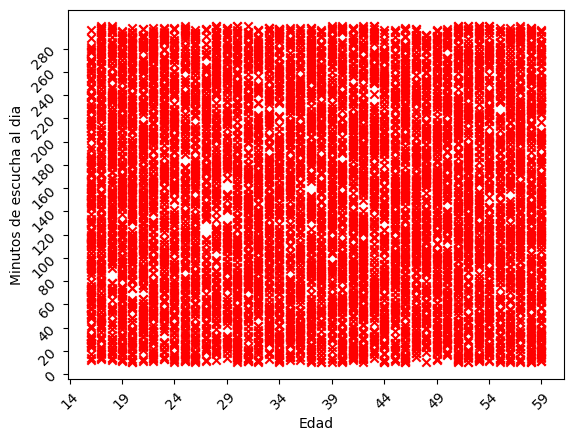

In [5]:
print("El tamaño de X es: ", X.shape[0], " filas y ", X.shape[1], " columna(s) ", X.shape)
print("La longitud del vector y es: ", len(y), y.shape)

print("Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]")
for i in range(0,5):
  print("\t", X['age'][i],  " | ", y['listening_time'][i]) 

# Imprimir los datos
plt.scatter(X,y, marker = "x", c = "red")
plt.xlabel("Edad")
plt.ylabel("Minutos de escucha al dia")
plt.xticks(np.arange(14, 61, 5), rotation=45) 
plt.yticks(np.arange(0, 300, 20), rotation=45)
#plt.xlim(0,8000) # Estamos limitando el eje x. Si los datos cambian, probablemente habrá que modificar estos valores
#plt.ylim(10,100) # Estamos limitando el eje y. Si los datos cambian, probablemente habrá que modificar estos valores
plt.show()

Text(0.5, 1.0, 'Grafico sumatorio')

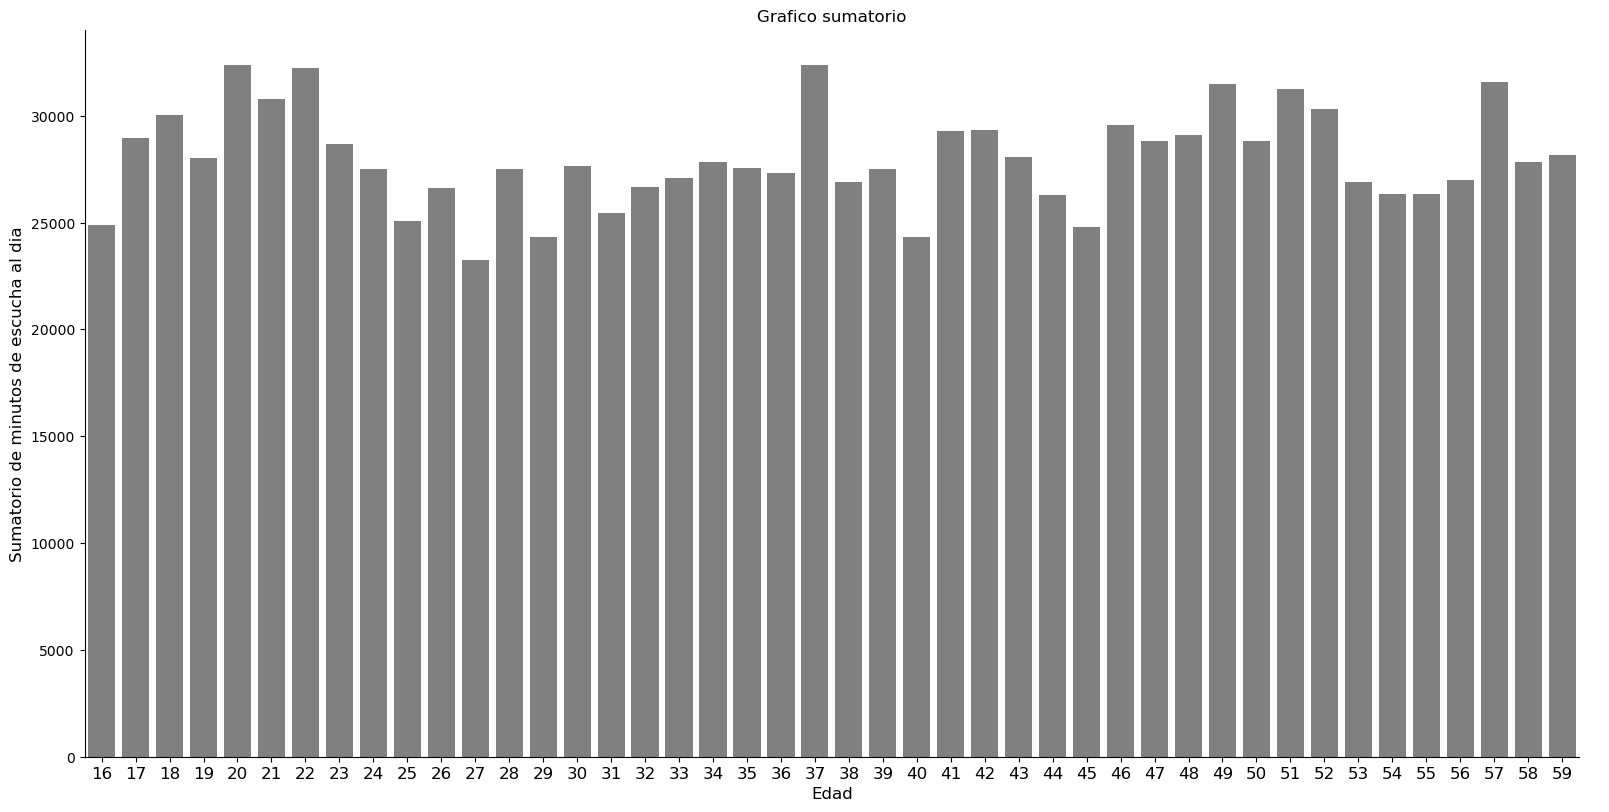

In [6]:
sns.catplot(x="age", y="listening_time", data=file, color="grey", kind="bar", height=8, aspect=2, errorbar=None, estimator="sum")
plt.xticks(size=12)
plt.xlabel("Edad", size=12)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Sumatorio de minutos de escucha al dia", size=12)
plt.title("Grafico sumatorio")

Text(0.5, 1.0, 'Grafico media')

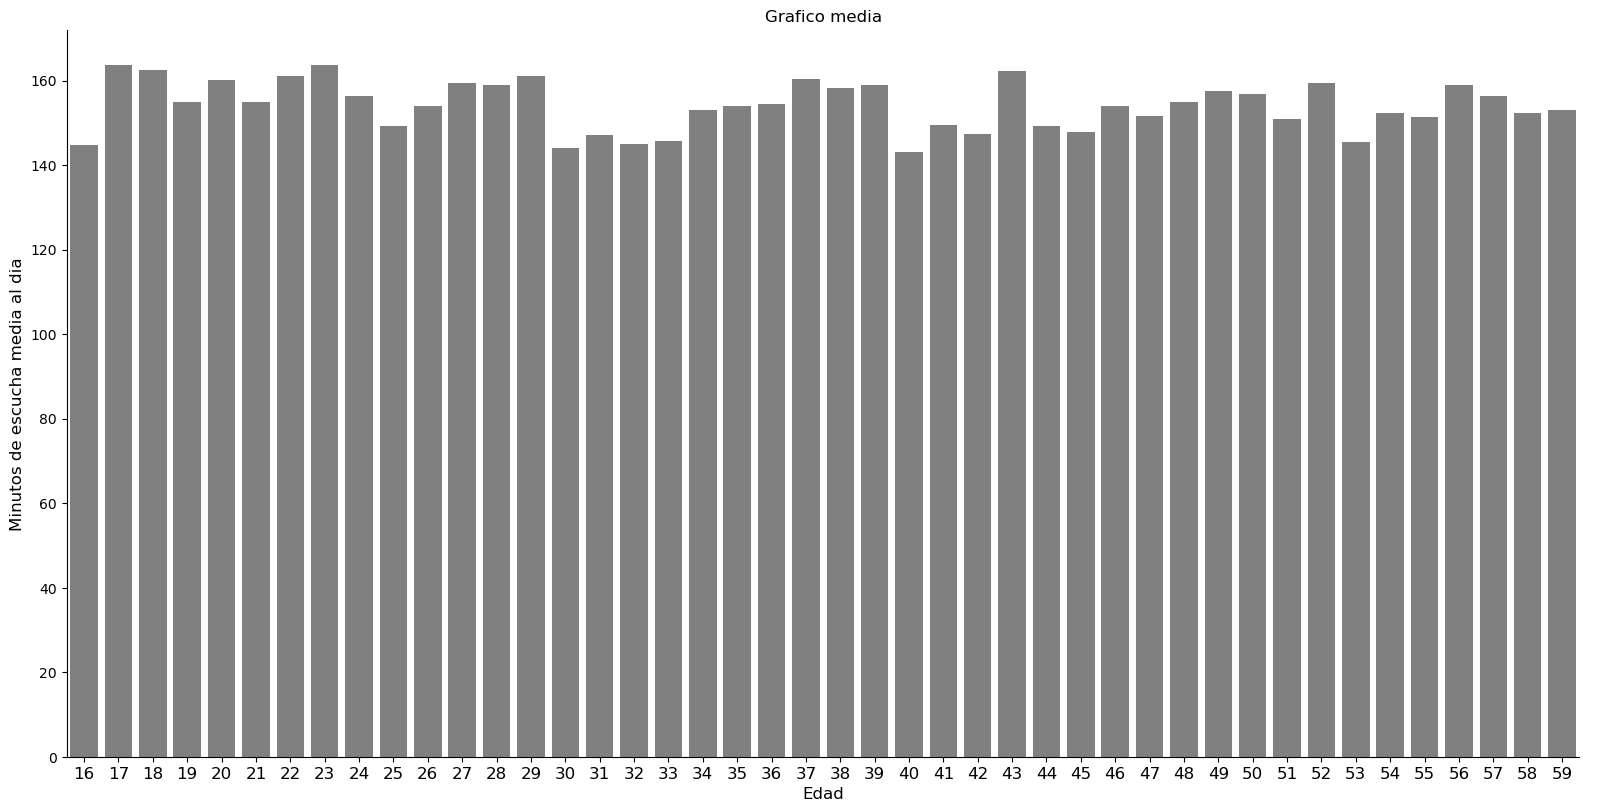

In [7]:
sns.catplot(x="age", y="listening_time", data=file, color="grey", kind="bar", height=8, aspect=2, errorbar=None, estimator="mean")
plt.xticks(size=12)
plt.xlabel("Edad", size=12)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Minutos de escucha media al dia", size=12)
plt.title("Grafico media")

Comrueba cuantas instancias existen para cada valor de la edad, asi comprobamos que no hay edad con pocos valores o edad con demasiados valores.

In [8]:
#file.groupby("age").count()["user_id"] # Comentado pues ya está en la documentacion

La grafica demuestra que independientemente de la edad se puede dar un tiempo de escucha. Como no se saca informacion en claro, esta relación no nos sirve.
Vamos a probar si las canciones escuchadas en un dias y el indice de salto entre canciones tiene algun tipo de relación.

In [9]:
# names=["user_id","gender","age","country","subscription_type","listening_time","songs_played_per_day","skip_rate","device_type","ads_listened_per_week","offline_listening","is_churned"]

# Para X = "songs_played_per_day" y para y = "skip_rate"
X = pd.DataFrame({"songs_played_per_day":file["songs_played_per_day"]})
y = pd.DataFrame({'skip_rate': file['skip_rate']})


El tamaño de X es:  8000  filas y  1  columna(s)  (8000, 1)
La longitud del vector y es:  8000 (8000, 1)
Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]
	 23  |  0.2
	 62  |  0.34
	 38  |  0.04
	 2  |  0.31
	 57  |  0.36


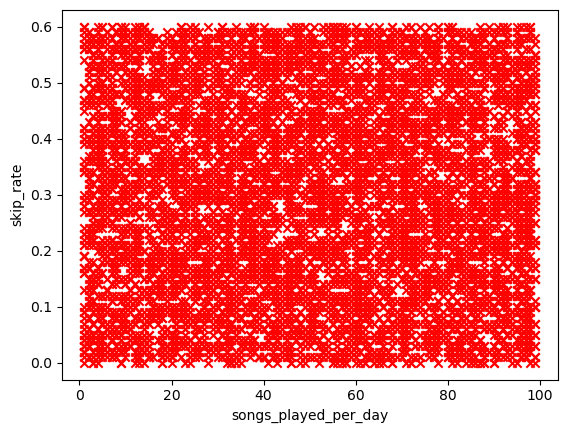

In [10]:
print("El tamaño de X es: ", X.shape[0], " filas y ", X.shape[1], " columna(s) ", X.shape)
print("La longitud del vector y es: ", len(y), y.shape)

print("Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]")
for i in range(0,5):
  print("\t", X['songs_played_per_day'][i],  " | ", y['skip_rate'][i]) 

# Imprimir los datos
plt.scatter(X,y, marker = "x", c = "red")
plt.xlabel("songs_played_per_day")
plt.ylabel("skip_rate")
plt.show()

Tal como sucedió con la primera grafica, no se puede sacar nada en claro de esta relación. Se probará ahora y por ultima instancia si las canciones escuchadas en un dia y el tiempo de escucha tienen algun tipo de relación.

In [11]:
# Para X = "songs_played_per_day" y para y = "listening_time"
X = pd.DataFrame({"songs_played_per_day":file["songs_played_per_day"]})
y = pd.DataFrame({'listening_time': file['listening_time']})

"""
e = pd.DataFrame({"songs_played_per_day":file["songs_played_per_day"],
                  'listening_time': file['listening_time']})

e.sort_values("listening_time", ascending = False)
"""

'\ne = pd.DataFrame({"songs_played_per_day":file["songs_played_per_day"],\n                  \'listening_time\': file[\'listening_time\']})\n\ne.sort_values("listening_time", ascending = False)\n'

El tamaño de X es:  8000  filas y  1  columna(s)  (8000, 1)
La longitud del vector y es:  8000 (8000, 1)
Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]
	 23  |  26
	 62  |  141
	 38  |  199
	 2  |  36
	 57  |  250


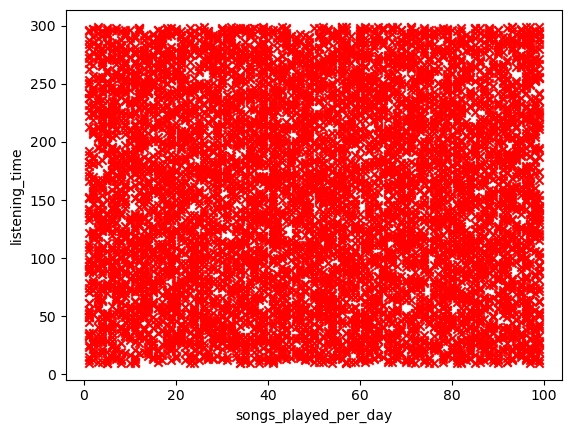

In [12]:
print("El tamaño de X es: ", X.shape[0], " filas y ", X.shape[1], " columna(s) ", X.shape)
print("La longitud del vector y es: ", len(y), y.shape)

print("Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]")
for i in range(0,5):
  print("\t", X['songs_played_per_day'][i],  " | ", y['listening_time'][i]) 

# Imprimir los datos
plt.scatter(X,y, marker = "x", c = "red")
plt.xlabel("songs_played_per_day")
plt.ylabel("listening_time")
plt.show()

Volvemos a no sacar ningún dato en claro. Parece ser que hay personas que escuchas muchas canciones por muy poco tiempo y personas que escuchan pocas canciones por un tiempo prolongado, por lo que no se puede sacar ninguna relación clara.
Visto que es complicado ver una relación de manera sencilla, vamos a comparar todas las columnas contra todas para ver si entre algunas existe alguna relación clara.

En la siguiente celda, hay comentado un trozo de codigo con comentarios multilinea bajo el comentario: "# DESCOMENTAR PARA VER GRAFICAS". Tal como dice, se puede descomentar para ver una grafica por cada columna con otra del dataset, sin embargo son tantas tablas que era poco practico, por lo que se ha optado por realizar el coeficiente de correlacion de Pearson entre todas las columnas. Este coeficiente mide cuanto de relacionadas están dos columnas (desde -1 a 1), se considera que para un coeficiente mayor a 0.6 (o menor a -0.6), la relacion es buena, mayor a 0.8 (o menor a -0.8) es excelente y para un coeficiente de 1 (o -1) la relación entre ambas columnas es perfecta.

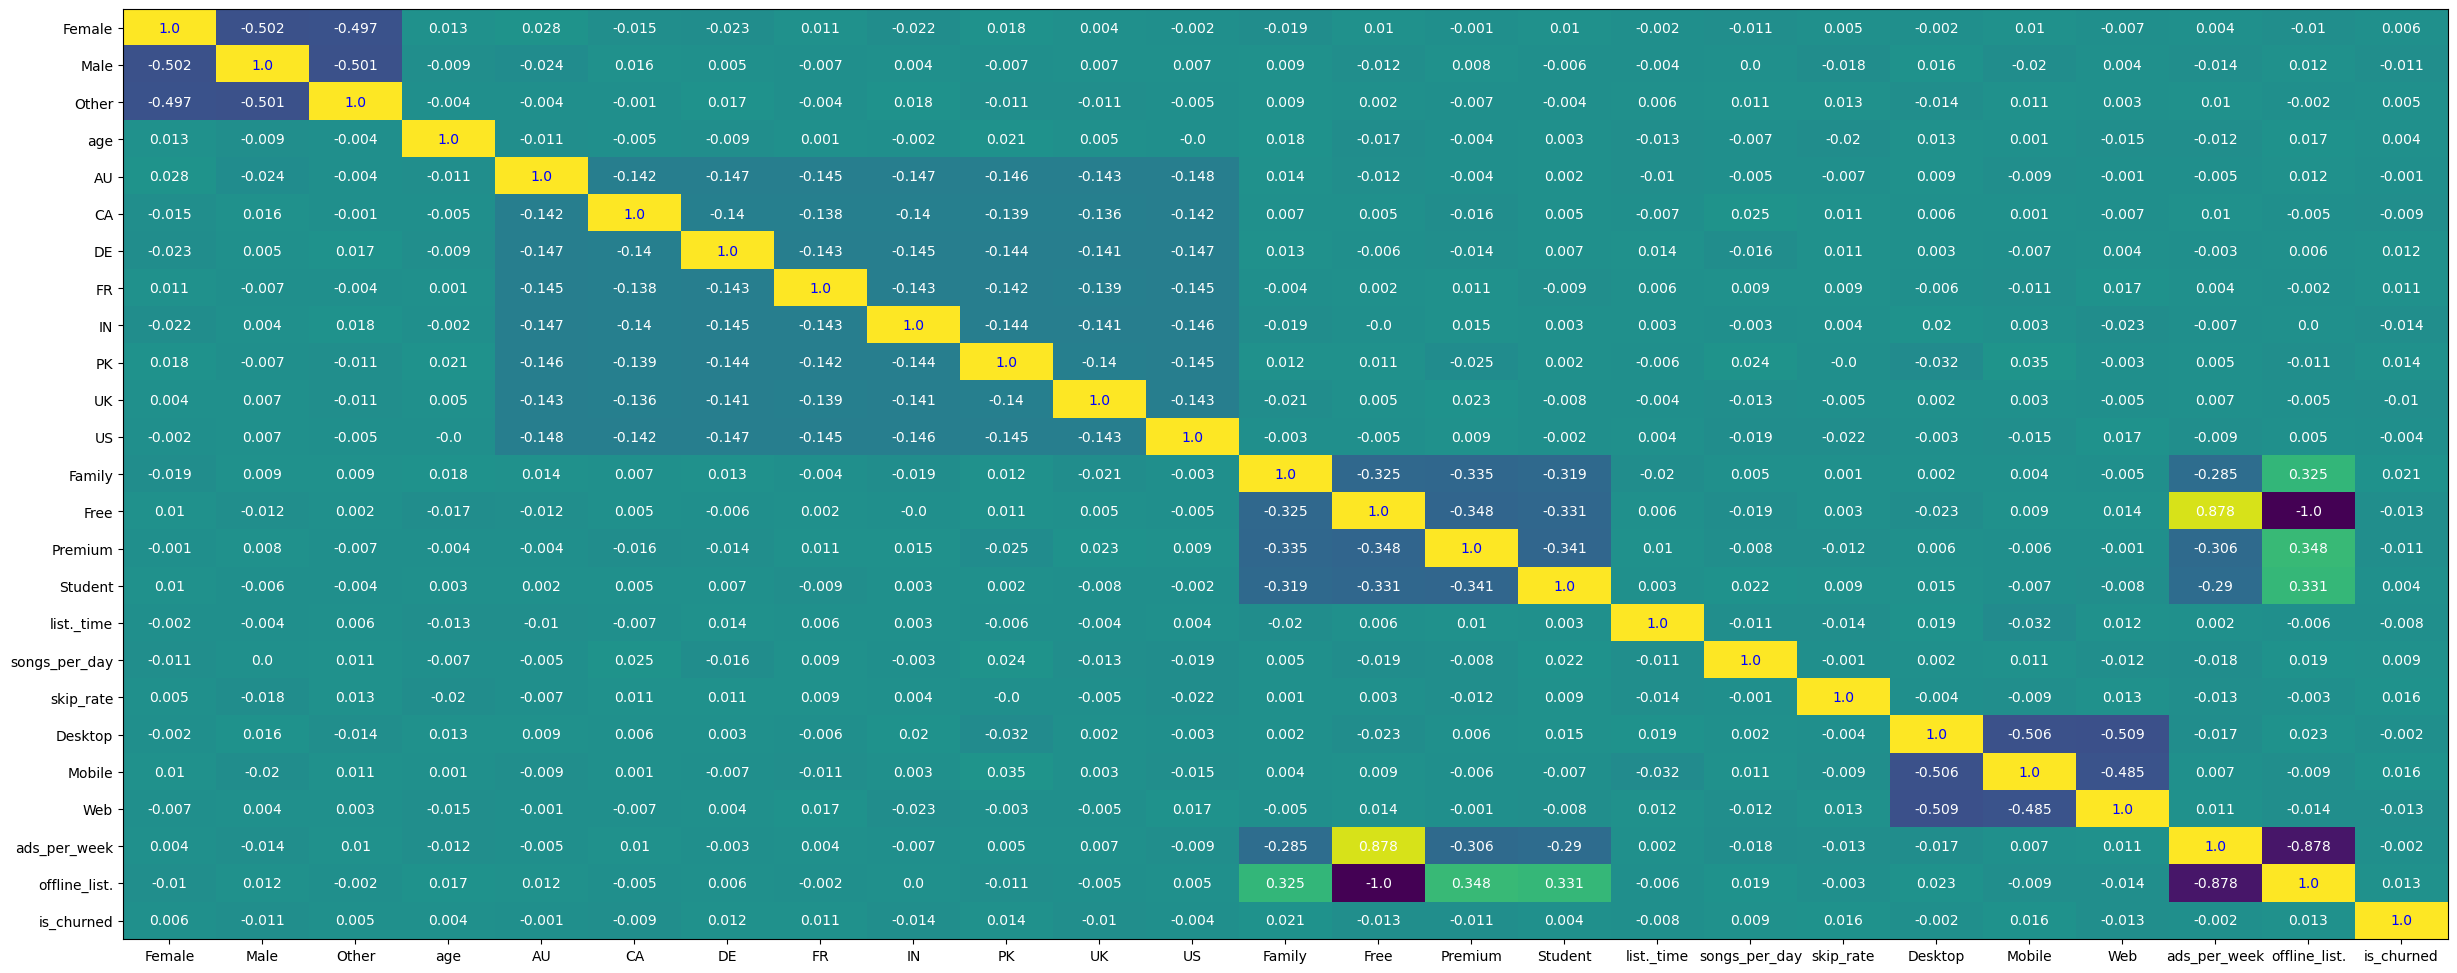

In [13]:
columnas = file.columns

for i in range(len(columnas)):
    for j in range(i + 1, len(columnas)):
        col_x = columnas[i]
        col_y = columnas[j]

        # DESCOMENTAR PARA VER GRAFICAS
        """
        plt.scatter(file[col_x], file[col_y])
        plt.xlabel(col_x)
        plt.ylabel(col_y)
        plt.title(f'{col_x} vs {col_y}')
        plt.grid(True)
        plt.show()
        """
gender = pd.get_dummies(file['gender'])
country = pd.get_dummies(file['country'])
subscription_type = pd.get_dummies(file['subscription_type'])
device_type = pd.get_dummies(file['device_type'])

fileAux = pd.DataFrame({
     #"user_id":file["user_id"]
    
    "Female":gender["Female"]
    ,"Male":gender["Male"]
    ,"Other":gender["Other"]
    ,"age":file["age"]
    
    ,"AU":country["AU"]
    ,"CA":country["CA"]
    ,"DE":country["DE"]
    ,"FR":country["FR"]
    ,"IN":country["IN"]
    ,"PK":country["PK"]
    ,"UK":country["UK"]
    ,"US":country["US"]
    
    ,"Family":subscription_type["Family"]
    ,"Free":subscription_type["Free"]
    ,"Premium":subscription_type["Premium"]
    ,"Student":subscription_type["Student"]
    
    ,"listening_time":file["listening_time"]
    ,"songs_played_per_day":file["songs_played_per_day"]
    ,"skip_rate":file["skip_rate"]
    
    ,"Desktop":device_type["Desktop"]
    ,"Mobile":device_type["Mobile"]
    ,"Web":device_type["Web"]
    
    ,"ads_listened_per_week":file["ads_listened_per_week"]
    ,"offline_listening":file["offline_listening"]
    ,"is_churned":file["is_churned"]
})

correlaciones= fileAux.corr()

plt.figure(figsize=(30,30))
#fig, ax = plt.subplots()
#plt.subplots_adjust(wspace=100000)
plt.imshow(correlaciones, aspect=0.4)


labs=["Female", "Male", "Other"
    ,"age"
    ,"AU", "CA" ,"DE" ,"FR" ,"IN" ,"PK" ,"UK" ,"US"
    ,"Family" ,"Free" ,"Premium","Student"
    ,"list._time" ,"songs_per_day" ,"skip_rate"
    ,"Desktop" ,"Mobile" ,"Web"
    ,"ads_per_week" ,"offline_list." ,"is_churned"
]


plt.xticks(np.arange(len(labs)), labels = labs)
plt.yticks(np.arange(len(labs)), labels = labs)

#print(correlaciones)


for i in range(len(labs)):
    for j in range(len(labs)):
        colum = correlaciones.columns[j]
        if j == i:
            text = plt.text(j, i, round(correlaciones[colum].iloc[i], 3),
                       ha = "center", va = "center", color = "b")
        else:
            text = plt.text(j, i, round(correlaciones[colum].iloc[i], 3),
                       ha = "center", va = "center", color = "w")

plt.show()
                       

Tras observar los valores con detenimiento (e ignorando las correlaciones de 1 que salen al comparar una columna consigo misma (ya que cuando una columna crece, naturalmente, la columna crece) e ignorando tambien las relaciones entre columnas que han sido divididas, como genero con femenino y masculino (ya que cuando alguien tiene de genero femenino no puede ser masculino) e igual con other), se puede observar que en este dataset apenas existe relacion entre las columnas. Existen unas pocas un tanto obvias, como puede ser tener una subscripcion de pago y no tener anuncios, pero cuando tu subscripcion es gratis tampoco sabemos mucha información de cuantos anuncios vas a tener. Otra es el tiempo de escucha offline y los anuncios escuchados, ya que si escuchas sin conexión a wifi, no te van a salir anuncios (ademas que esto solo se daria con subscripciones de pago, por lo que termina dando la misma informacion, subscripcion de pago no tiene anuncios). Tras este analisis se considera que realizar un modelo de regresión lineal univariable es inutil, ya que no existe una columna que ofrezca un muy buen valor de otra. Lo unico que se puede probar es si con muchas columnas se puede llegar a un buen resultado, por tanto se implementará un modelo de regresión lineal multivariable.

## Implementacion del modelo (1)
Tras la investigación de relaciones y haber dejado claro que el modelo debe ser multivariable, se va a escoger como clase la columna "age", ya que consideramos que puede ser de utilidad para una empresa conocer la edad de sus clientes. Esta clase se va a predecir con las columnas: "listening_time", "songs_played_per_day" y "skip_rate". Se han elegido estas clases porque podriamos encontrar una relación oculta entre estas columnas juntas y la edad (lo mismo existe un patron de jovenes que saltan muchas canciones, por lo tanto esuchan muchas distintas al dia y por mucho tiempo).

Se inicializan los valores de X e y.

In [14]:
X = pd.DataFrame({
    #"user_id":file["user_id"]
    
    #,"Female":gender["Female"]
    #,"Male":gender["Male"]
    #,"Other":gender["Other"]
    
    #,"age":file["age"]
    
    #,"AU":country["AU"]
    #,"CA":country["CA"]
    #,"DE":country["DE"]
    #,"FR":country["FR"]
    #,"IN":country["IN"]
    #,"PK":country["PK"]
    #,"UK":country["UK"]
    #,"US":country["US"]
    
    #,"Family":subscription_type["Family"]
    #,"Free":subscription_type["Free"]
    #,"Premium":subscription_type["Premium"]
    #,"Student":subscription_type["Student"]
    
    "listening_time":file["listening_time"]
    ,"songs_played_per_day":file["songs_played_per_day"]
    ,"skip_rate":file["skip_rate"]
    
    #,"Desktop":device_type["Desktop"]
    #,"Mobile":device_type["Mobile"]
    #,"Web":device_type["Web"]
    
    #,"ads_listened_per_week":file["ads_listened_per_week"]
    #,"offline_listening":file["offline_listening"]
    #,"is_churned":file["is_churned"]               
                 })
y = file["age"]

##### Creación de funciones necesarias (1)
Aqui se encuentran todas las funciones necesarias para que la implementación funcione correctamente, incluyendo la función de coste y el desccenso de gradiente, ademas de la normalización y una función para visualizar el trayecto del descenso de gradiente.

In [15]:
def thetaInicial(tam):
    return np.zeros(tam)

def normalize(X):
    mu = X.mean()
    sigma = X.std()
    X_norm = pd.DataFrame((X - mu)/(sigma))
    return X_norm, mu, sigma

# Funcion de coste
def computeCost(X, y, theta):
    m = len(y)
    J = 0
    J = ( 1/(2*m) ) * np.dot(np.transpose(np.dot(X, theta) - y ), np.dot(X, theta) - y )
    return J

# Funcion del gradiente
def gradientDescent(X, y, theta, alpha, iterations):
    
    m = len(y)
    J_history = []
    for current_iter in range(iterations):
        
        aux1 = np.dot (np.transpose(X), (np.dot(X, theta) - y) )
        aux2 = alpha*(1/m)* aux1
        #print("aux2:", aux2)
        #print("theta", theta)
        theta = theta - aux2
        
        current_cost = computeCost(X,y,theta)
        J_history.append(current_cost)
    return theta, J_history
    
# Funcion plot historico del coste
def mostrarHistorico(J_history):
    plt.plot(range(len(J_history)),J_history)
    plt.xlabel("Iteraciones")
    plt.ylabel("Coste")
    #plt.ylim(0, 500)
    plt.show()

Normalizamos los valores de X.

In [16]:
X_norm, mu, sigma = normalize(X)
#X_norm = X
print(X_norm)

      listening_time  songs_played_per_day  skip_rate
0          -1.524339             -0.953514  -0.576791
1          -0.155546              0.417323   0.229688
2           0.534802             -0.426269  -1.498481
3          -1.405313             -1.691657   0.056871
4           1.141833              0.241575   0.344899
...              ...                   ...        ...
7995        0.987099             -0.496568  -0.000734
7996       -1.107750              0.487623   1.669829
7997       -0.869699              0.417323   0.172082
7998        1.082320              1.542113  -0.173551
7999        0.665731              0.628221   0.920956

[8000 rows x 3 columns]


Introducimos la columna de unos como primera columna de X.

In [17]:
ones = np.ones((len(y), 1))
X_norm['uno'] = ones

X_norm = X_norm[[
    'uno'
    #,"user_id"
    
    #,"Female"
    #,"Male"
    #,"Other"
    #,"age"
    
    #,"AU"
    #,"CA"
    #,"DE"
    #,"FR"
    #,"IN"
    #,"PK"
    #,"UK"
    #,"US"
    
    #,"Family"
    #,"Free"
    #,"Premium"
    #,"Student"
    
    ,"listening_time"
    ,"songs_played_per_day"
    ,"skip_rate"
    
    #,"Desktop"
    #,"Mobile"
    #,"Web"
    
    #,"ads_listened_per_week"
    #,"offline_listening"
    #,"is_churned"
]]

print(X_norm)

      uno  listening_time  songs_played_per_day  skip_rate
0     1.0       -1.524339             -0.953514  -0.576791
1     1.0       -0.155546              0.417323   0.229688
2     1.0        0.534802             -0.426269  -1.498481
3     1.0       -1.405313             -1.691657   0.056871
4     1.0        1.141833              0.241575   0.344899
...   ...             ...                   ...        ...
7995  1.0        0.987099             -0.496568  -0.000734
7996  1.0       -1.107750              0.487623   1.669829
7997  1.0       -0.869699              0.417323   0.172082
7998  1.0        1.082320              1.542113  -0.173551
7999  1.0        0.665731              0.628221   0.920956

[8000 rows x 4 columns]


Comprobamos los tamaños.

In [18]:
theta = thetaInicial(X_norm.shape[1])
print(X_norm.shape, y.shape, theta.shape)

(8000, 4) (8000,) (4,)


Ejecutamos la función coste para ver el coste inicial con theta inicializado a 0.

In [19]:
J_base = computeCost(X_norm, y, theta)
print(f"El coste inicializando theta a 0: {J_base}")

El coste inicializando theta a 0: 790.3660625


Inicializamos los thetas y realizamos el gradiente.

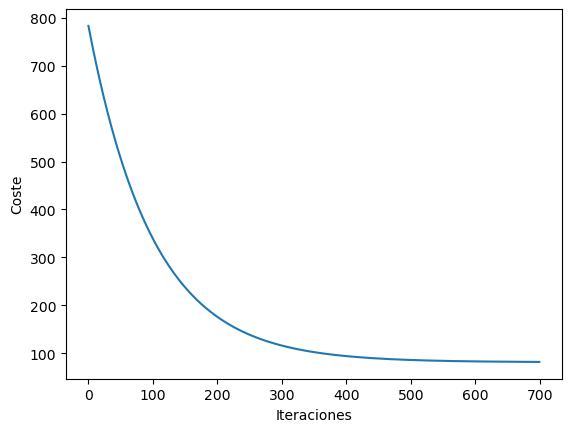

In [20]:
theta = thetaInicial(X_norm.shape[1])
alpha =  0.005
theta, J_history = gradientDescent(X_norm, y, theta, alpha, 700)
mostrarHistorico(J_history)

El gradiente se realiza correctamente ya que el coste converge dadas unas iteraciones. Ahora, para comprobar que se ha realizado correctamente, se van a comparar los valores reales de la clase con los valores predichos por el modelo. Somos conscientes de que se está realizando con los datos de entrenamiento, y que por tanto los resultados deben ser muy positivos por el hecho de que se está prediciento con los datos con los que se ha entrenado, pero observen el resultado.

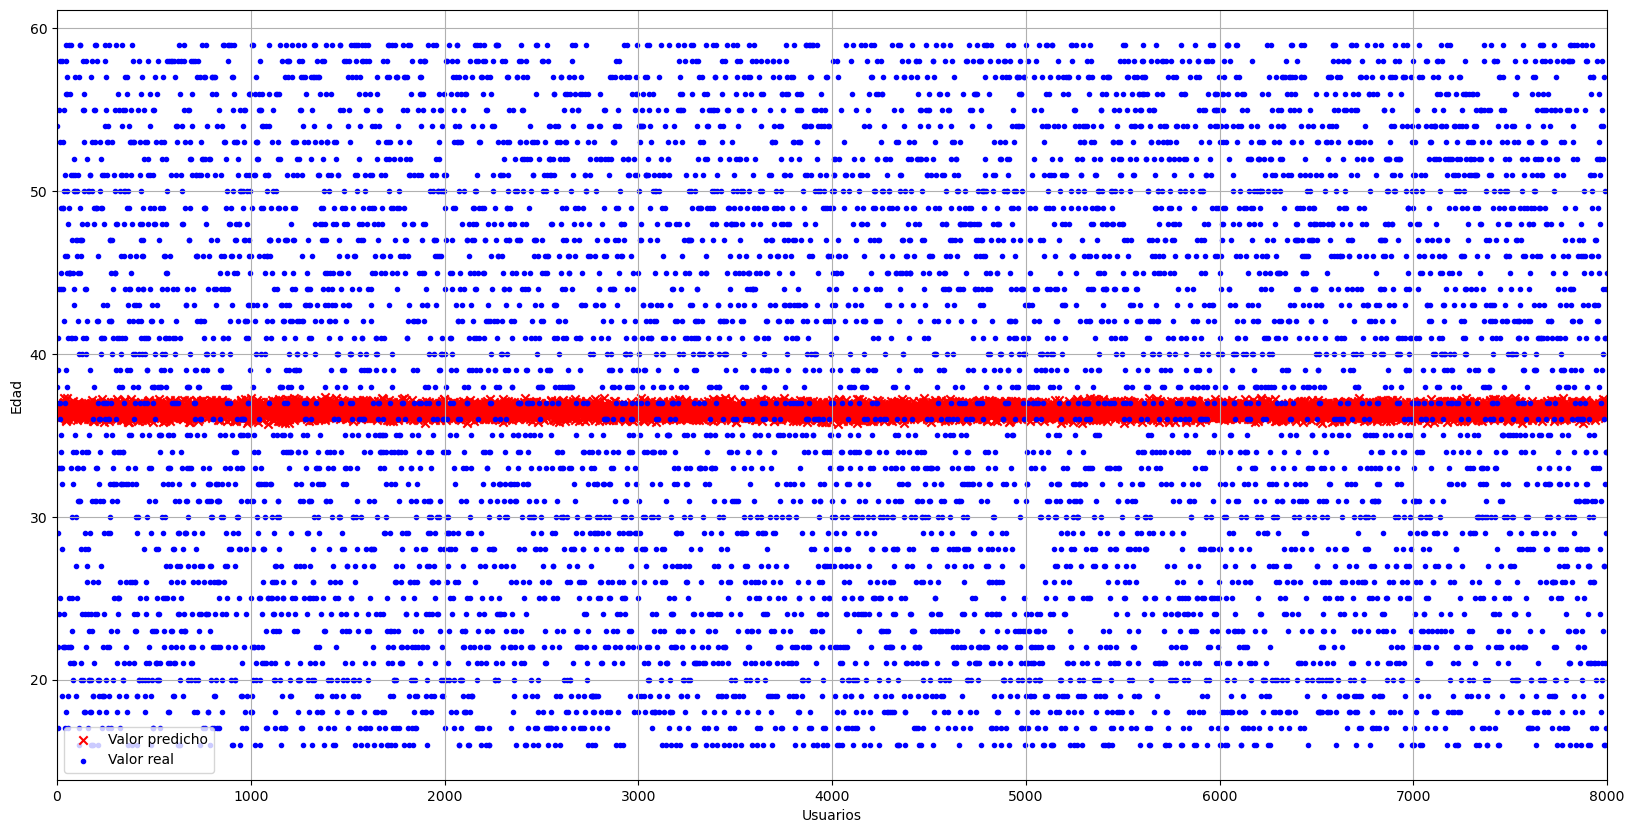

In [21]:
#J = np.dot(theta, [1, 26, 23, 0.2])
#J = np.dot(theta, [1, 141, 62, 0.34])

#J = computeCost(X_norm, y, theta);

predicho = []
for i in range(X.shape[0]):
    J = np.dot(theta, X_norm.iloc[i])
    predicho.append(J)
    #if i < 10:
        #print("Coste:", J)

plt.figure(figsize=(20,10))
plt.scatter(range(X.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X.shape[0]), y, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuarios")
plt.ylabel("Edad")
plt.grid(True)
plt.xlim(0, 8000)
#plt.xlim(0, 100) # Cambiar para ver mejor
plt.legend()
plt.show()


Se ha puesto una funcion "plt.xlim(0, 8000)" por si se quieren ver los datos mas de cerca, cambiando de 8000 a 100 se ven mejor.
### ¿Que está pasando?
No hemos explicado anteriormente en profundidad que muestra esta grafica. Los puntos azules muestran los valores reales de la clase del dataset (age) (eje y) para los diferentes usuarios (eje x). Las cruces rojas muestran las predicciones para esos valores. Entonces, ¿porque salen todos en el centro en vez de estar con los azules?. Ademas que se está probando con el conjunto de entrenamiento, deberia de salir un resultado casi perfecto.

Se podría pensar que el alpha no ha sido bien seleccionado o que necesita mas iteraciones, pero si se modifica se verá que, si se consigue un avance es nimio.

Como el resultado es muy desmedido (proponiendo el modelo siempre la media como predicción), hemos contemplado que se pueden estar dando uno de estos dos casos:
1. El modelo es erroneo y no predice correctamente, ni para los datos de entrenamiento.
2. El dataset no tiene columnas con una relacion lo suficientemente fuerte como para crear modelos robustos.

## Implementación del modelo (2)
Como ya se ha demostrado anteriormente que el dataset (comparando columnas individuales) sus columnas tienen muy poca relacion, se va a comprobar ahora si el modelo funciona correctamente probando con un dataset que si tiene columnas relacionadas.
El dataset elegido es "ex1data.txt", el cual tiene dos columnas y su correlación es de más de 0.8, lo que significa que están muy relacionados.

Sobre el fichero ex1data1.txt, contiene los siguientes datos: la primera columna es la población de una ciudad y la segunda es el beneficio de un establecimiento en esa ciudad. Un valor negativo de beneficio indica una pérdida.

In [22]:
file2 = pd.read_csv("ex1data1.txt", names=["poblacion", "beneficio"])
X = pd.DataFrame({"poblacion": file2["poblacion"]})
y = file2["beneficio"]
file2.corr()

,poblacion,beneficio
poblacion,1.000000,0.837873
beneficio,0.837873,1.000000


Se procede con el mismo procedimiento que con el dataset de Spotify.

In [23]:
X_norm, mu, sigma = normalize(X)
#X_norm = X
print(X_norm)

    poblacion
0   -0.529654
1   -0.680150
2    0.092716
3   -0.298872
4   -0.594333
..        ...
92  -0.591517
93  -0.737593
94   0.034523
95   1.352547
96  -0.703613

[97 rows x 1 columns]


In [24]:
ones = np.ones((len(y), 1))
X_norm['uno'] = ones
X_norm = X_norm[[
    "uno", "poblacion"
]]
print(X_norm)

    uno  poblacion
0   1.0  -0.529654
1   1.0  -0.680150
2   1.0   0.092716
3   1.0  -0.298872
4   1.0  -0.594333
..  ...        ...
92  1.0  -0.591517
93  1.0  -0.737593
94  1.0   0.034523
95  1.0   1.352547
96  1.0  -0.703613

[97 rows x 2 columns]


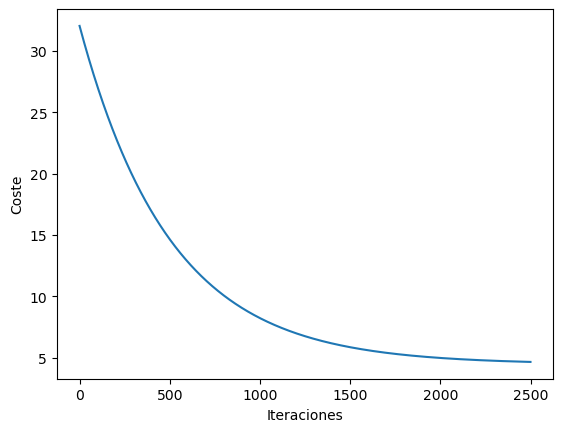

In [25]:
theta = thetaInicial(X_norm.shape[1])
alpha =  0.001
theta, J_history = gradientDescent(X_norm, y, theta, alpha, 2500)
mostrarHistorico(J_history)

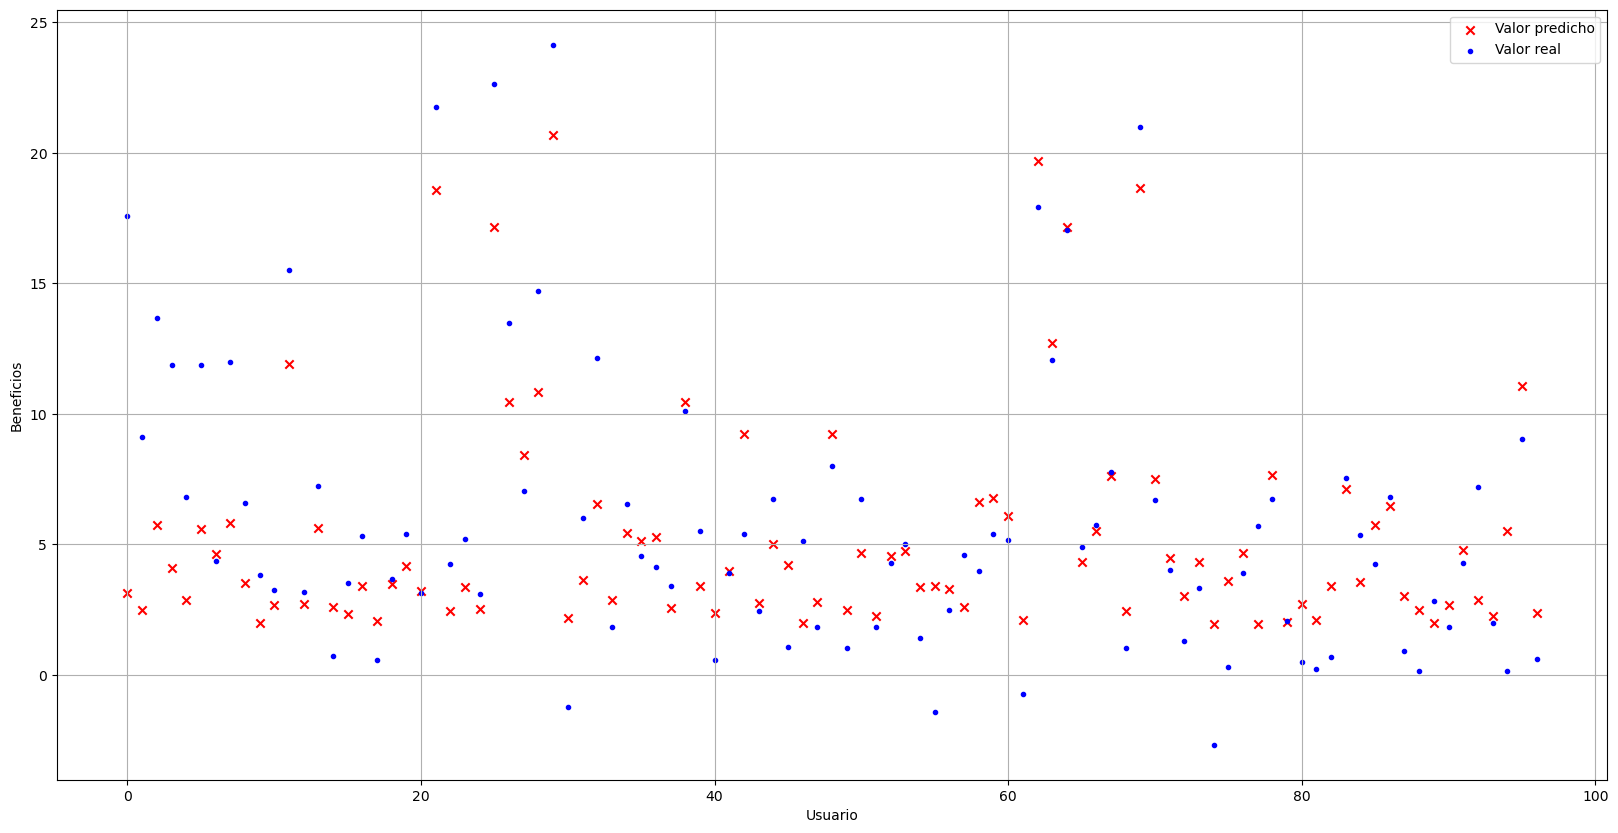

In [26]:
predicho = []
for i in range(X.shape[0]):
    J = np.dot(theta, X_norm.iloc[i])
    predicho.append(J)
    #if i < 10:
        #print("Coste:", J)

plt.figure(figsize=(20,10))
plt.scatter(range(X.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X.shape[0]), y, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Beneficios")
plt.grid(True)
#plt.xlim(0, 100)
plt.legend()
plt.show()

Al ser un modelo univariable si se puede pintar la recta de regresion y comprobar que efectivamente se adecua bien a los datos.

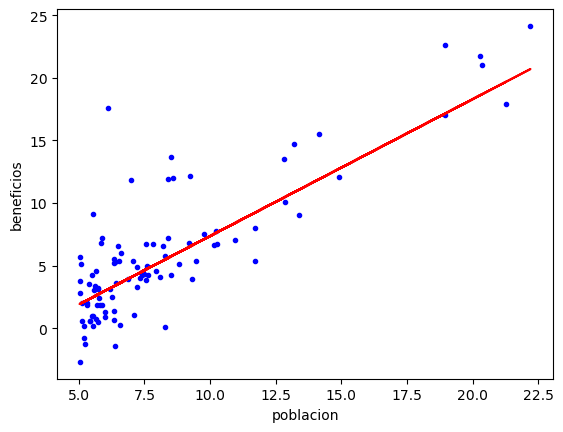

In [27]:
plt.plot(X, np.dot(X_norm,theta), color="red")
plt.scatter(X,y,marker = ".", c = "blue")
plt.xlabel("poblacion")
plt.ylabel("beneficios")
plt.show()

La implementacion no es erronea, ya que para un dataset con columnas relacionadas es capaz de encontrar un modelo que se adecua a los datos, sin embargo en el caso del dataset "spotify_churn_dataset.csv" no es capaz de encontrar un modelo que prediga valores distintos a la media, por lo tanto, sumado a las correlaciones que exploramos al inicio, se puede concretar que este dataset no es util para la realización de modelos y que por tanto los modelos serán poco precisos.

Partiendo de esto, se realizaran los modelos, pero naturalmente los resultados no van a tener ningun valor, puesto que este dataset no es valido para realizar modelos.

## Implementación del modelo (3)
Se va a realizar un modelo que prediga el numero de anuncios semanales con las columnas de tipo de subscripcion, tipo de dispositivo, tiempo de escucha diario, canciones escuchadas por dia y ratio de cambio de canción. Se ha tomado la columna de tipo de subscripcion por lo mencionado cuando se hizo la correlacion de las columnas (para las subscripciones de pago, al no haber anuncios, tiene una alta relacion, pero no es capaz de decir cuantos anuncios tienen las personas con una subscripcion gratuita). Se ha tomado el tipo de dispositivo porque se conoce que en el ambito real, hay dispositivos en los que saltan mas anuncios por hora que en otros (en los moviles por ejemplo). Se han tomado tiempo de escucha diario, canciones escuchadas por dia y ratio de cambio de canción porque podrían ser variables que afecten al numero de anuncios en conjunto (por ejemplo, si se saltan muchas canciones, )

### Inicialización de los parámetros.

In [28]:
X = pd.DataFrame({
    #"user_id":file["user_id"]
    
    #,"Female":gender["Female"]
    #,"Male":gender["Male"]
    #,"Other":gender["Other"]
    
    #,"age":file["age"]
    
    #,"AU":country["AU"]
    #,"CA":country["CA"]
    #,"DE":country["DE"]
    #,"FR":country["FR"]
    #,"IN":country["IN"]
    #,"PK":country["PK"]
    #,"UK":country["UK"]
    #,"US":country["US"]
    
    "Family":subscription_type["Family"]
    ,"Free":subscription_type["Free"]
    ,"Premium":subscription_type["Premium"]
    ,"Student":subscription_type["Student"]
    
    ,"listening_time":file["listening_time"]
    ,"songs_played_per_day":file["songs_played_per_day"]
    ,"skip_rate":file["skip_rate"]
    
    ,"Desktop":device_type["Desktop"]
    ,"Mobile":device_type["Mobile"]
    ,"Web":device_type["Web"]
    
    #,"ads_listened_per_week":file["ads_listened_per_week"]
    #,"offline_listening":file["offline_listening"]
    #,"is_churned":file["is_churned"]               
                 })
y = file["ads_listened_per_week"]

##### Funciones adicionales (2)
Otras funciones fueron añadidas en la primera implementación.

In [29]:
def generaIndicesKFolds(X, k):
    kf = KFold(n_splits=k)

    listado = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X)):

        listado.append({"Train":train_index, "Test":test_index})
        
        """
        print(f"Fold {i}:")
        print(f"  Train: index={train_index}")
        print(f"  Test:  index={test_index}")
        """
    return listado

def generaContenidoKFolds(X, y, indices):

    """
    X_train = pd.DataFrame()
    for index in indices["Train"]:
        X_train = X.iloc[index]
        y_train = y[[index]]
        
    for index in indices["Test"]:
        X_test = X.iloc[index]
        y_test = y[[index]]
    """
    X_train = X.iloc[indices["Train"] ]
    y_train = y.iloc[indices["Train"] ]
    
    X_val = X.iloc[indices["Test"] ]
    y_val = y.iloc[ indices["Test"] ]
    return X_train, y_train, X_val, y_val

def generaTrainTest(X, y, tamTest = 0.3):
    
    listaTest = []
    listaTrain = []
    i = 0
    tamanyo = int(len(y) * tamTest)
    while i < tamanyo:
        numero = int(random.random() * len(y))
        if numero not in listaTest:
            listaTest.append(numero)
            i += 1

    for i in range(len(y)):
        if i not in listaTest:
            listaTrain.append(i)

    X_train = X.iloc[listaTrain ]
    y_train = y[listaTrain]
    
    X_test = X.iloc[listaTest ]
    y_test = y[ listaTest ]
    return X_train, y_train, X_test, y_test

def normalizaYAnyade(X):
    X_norm, mu, sigma = normalize(X)
    
    ones = np.ones((X.shape[0], 1))
    X_norm['uno'] = ones

    array = ["uno"]
    for columna in X.columns:
        array.append(columna)
    
    X_norm = X_norm[array]
    #print(X_norm)
    return X_norm, mu, sigma

def calculaErrores(X, theta, y):
    MAE = 0
    MSE = 0
    RMSE = 0
    for i in range(len(y)):
        MAE += np.abs(y.iloc[i] - np.dot(theta, X.iloc[i]) )
        MSE += np.power(y.iloc[i] - np.dot(theta, X.iloc[i]) , 2)
    MAE = MAE/len(y)
    MSE = MSE/len(y)
    RMSE = np.sqrt(MSE)
    
    return  MAE, MSE, RMSE

### Fase de entrenamiento Y Evolución de la función de coste (Grafico de convergencia)
Se separa el conjunto original en train general y test general. Para cada iteracion del cross validation, se genera a partir del train general un conjunto train y otro validation, con los cuales se trabajará, mejorará el modelo y comprobará el error existente.

Fold 0


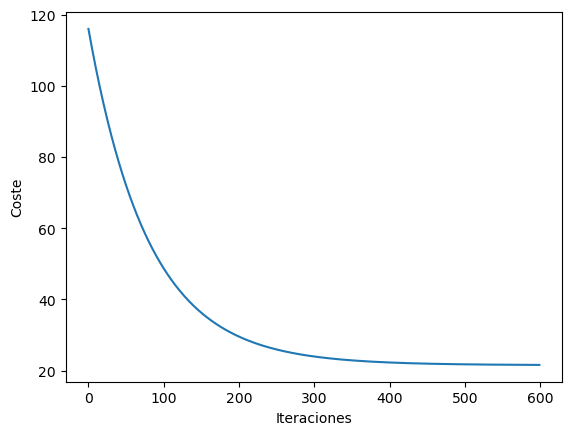

MAE: 2.687384104304324, MSE: 36.84078029467957, RMSE: 6.069660640816714
Fold 1


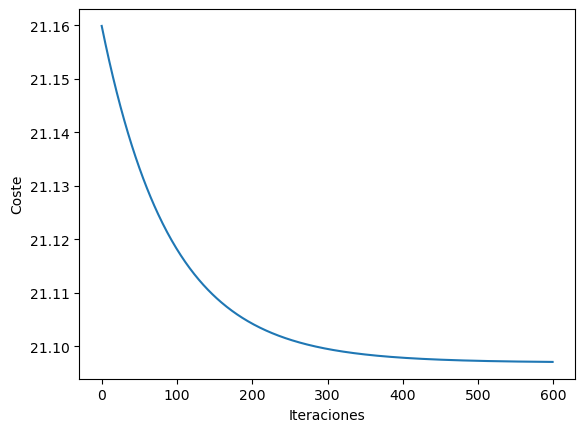

MAE: 3.1700623472028995, MSE: 44.677968390504866, RMSE: 6.684158016572085
Fold 2


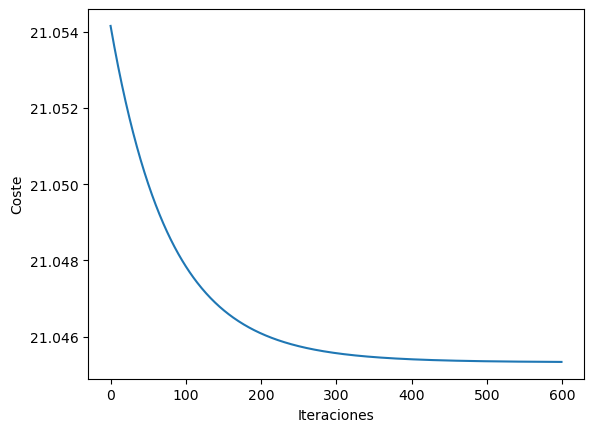

MAE: 3.3551693830449922, MSE: 46.207365477390375, RMSE: 6.797599979212544
Fold 3


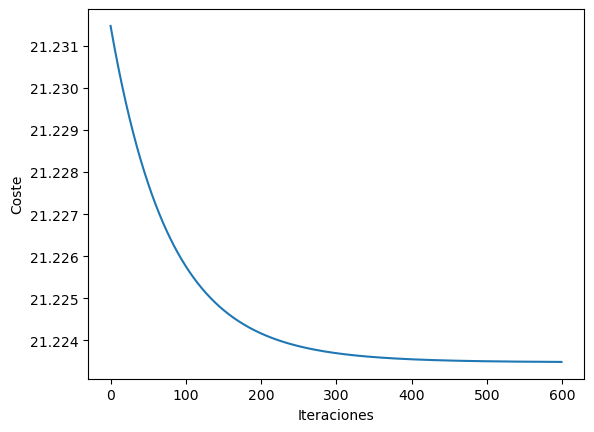

MAE: 3.088612757713512, MSE: 42.37180364137949, RMSE: 6.509362767689284
Fold 4


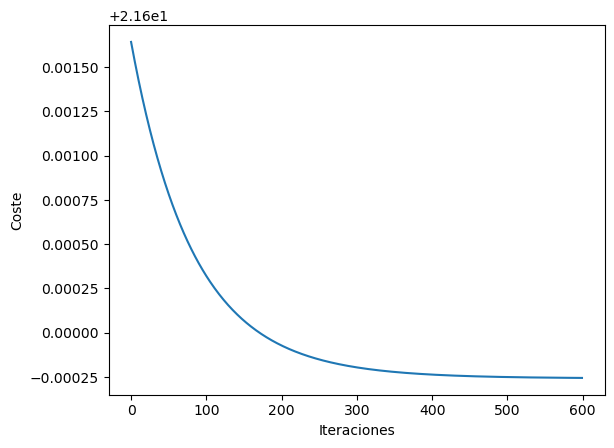

MAE: 2.7912089745539435, MSE: 35.57161911110677, RMSE: 5.964194757979217
Fold 5


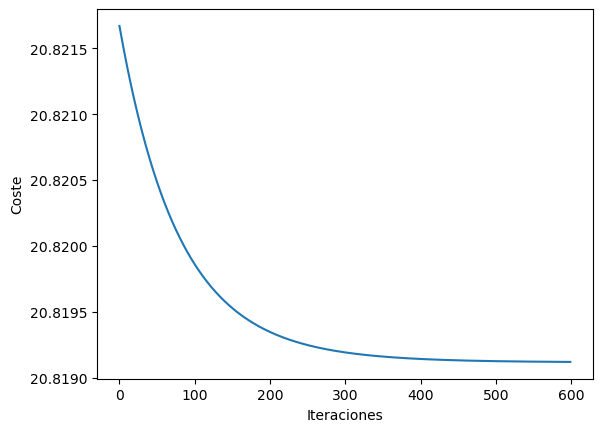

MAE: 3.4156863699550857, MSE: 49.68748253840509, RMSE: 7.048934851337831
Fold 6


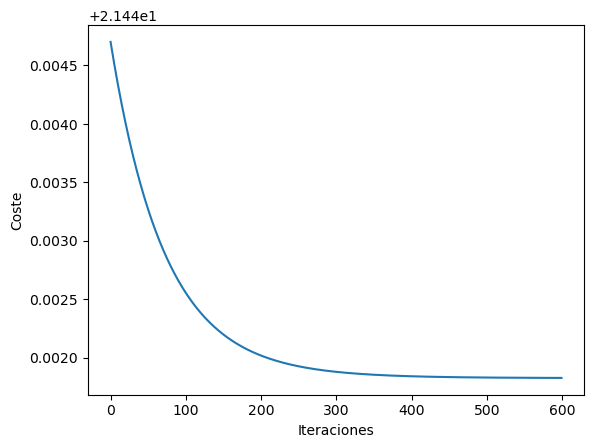

MAE: 2.8461900590493463, MSE: 38.45307596293925, RMSE: 6.201054423478256
Fold 7


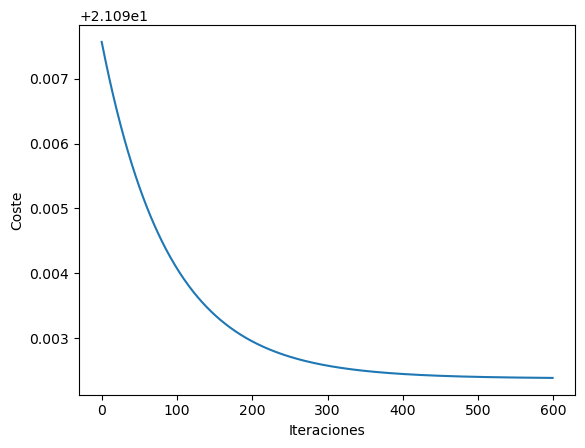

MAE: 3.2755489770358053, MSE: 45.29404783715203, RMSE: 6.730085277108458
Fold 8


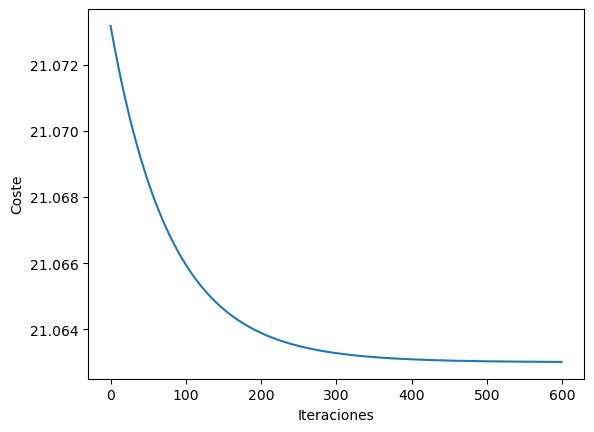

MAE: 3.1988855061103685, MSE: 45.18907003199084, RMSE: 6.722281609096039
Fold 9


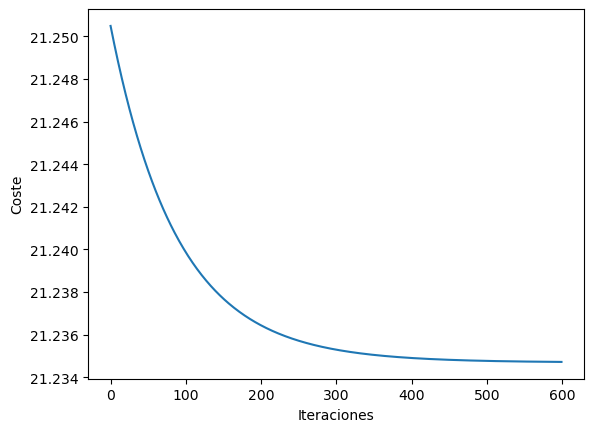

MAE: 3.1925527445849227, MSE: 43.83590539907926, RMSE: 6.6208689308186175


In [30]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")   
    

### Fase de predicción Y Métrica de evaluación apropiada.
Una vez se ha entrenado el modelo, se normaliza el conjunto de test, se calculan sus predicciones y se comparan con los valores reales de test general.

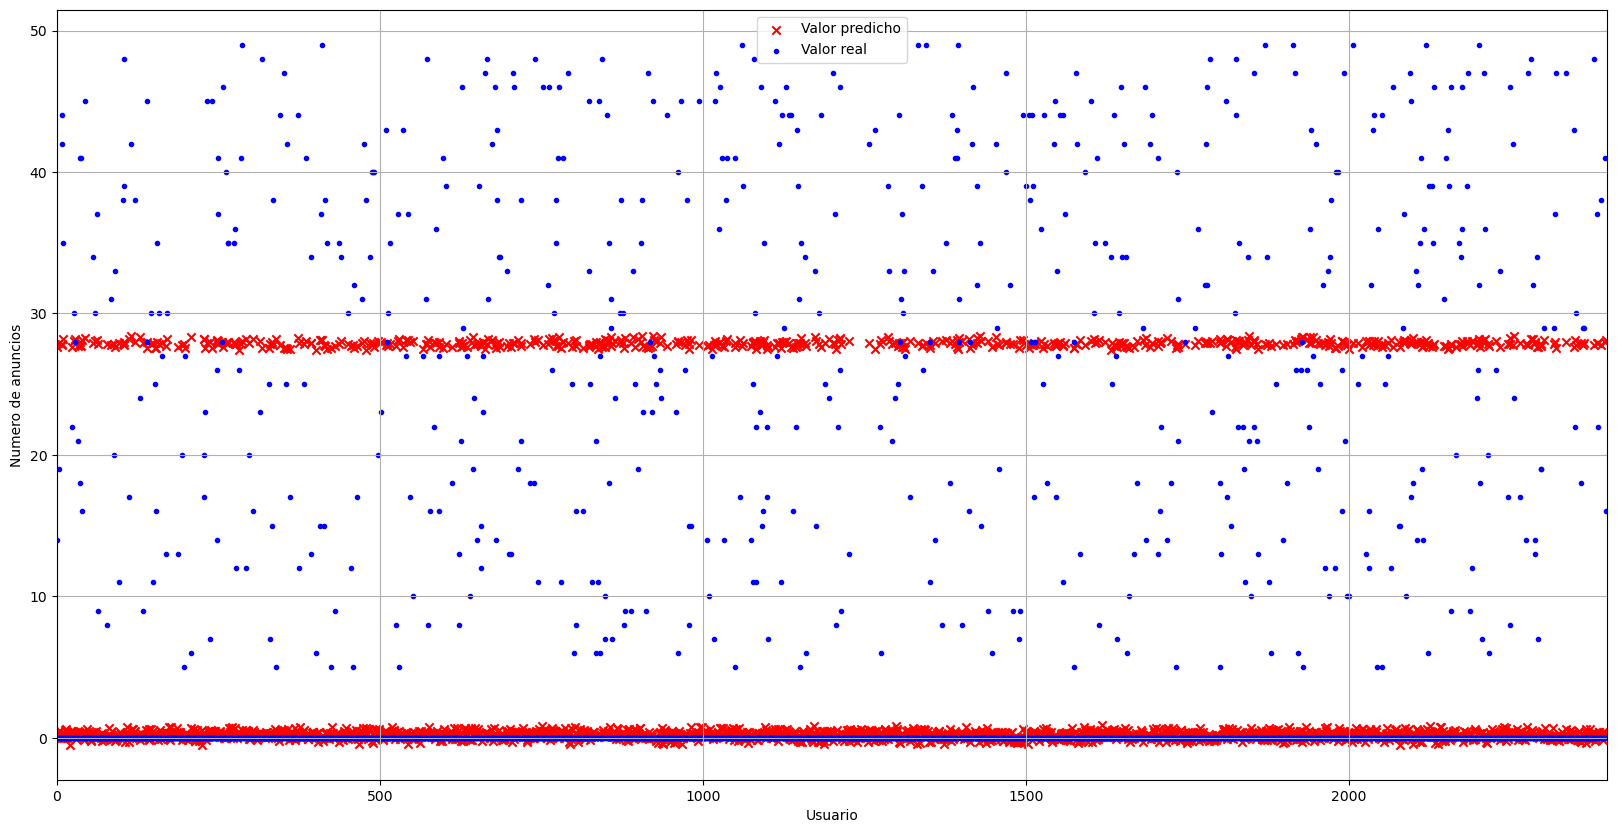

MAE: 3.0079819319533847, MSE: 42.456000585942235, RMSE: 6.515826930324518


In [31]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)



plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.legend()
plt.show()

MAE, MSE, RMSE = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

El modelo es capaz de encontrar correctamente los usuarios que no tienen anuncios (por el tipo de subscripcion, tal y como comentamos cuando se hicieron los coeficientes de corelacion) pero no es capaz de decir cuantos anuncios tienen los usuarios que tienen anuncios (también se comentó cuando se hizo el estudio de las correlaciones), asi que el modelo actua según lo esperado.

Los resultados de los errores podrian parecer bajos viendo los resultados dados en la grafica, ya que dice que el error absoluto medio es de 2.94 y el modelo no es capaz de salirse de la media, pero es tal y como comentamos anteriormente, como el modelo no es capaz de encontrar una relación a encontrado que si predice siempre en la media minimiza el error, por eso es el error tan bajo. Ademas como sus valores se alejan mucho de los reales, por lo que existen fallos grandes, el MSE se incrementa en gran medida.

# Modificaciones
Nuestro trabajo tratará las modificaciones de la regresión lineal.

## Apartado 1
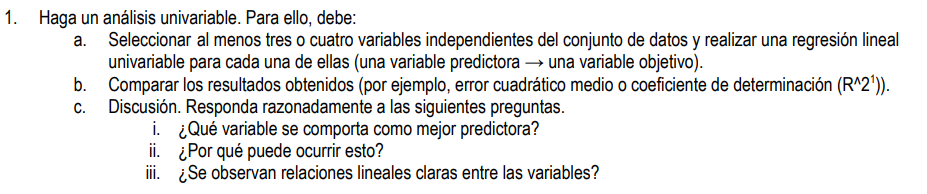

Tal como indica el enunciado del apartado 1, se seleccionarán 3/4 variables y se implementará una regresión lineal para cada una de ellas que prediga una variable del dataset. Se va a seleccionar como clase la columna "ads_listened_per_week", y como columnas predictoras "listening_time", "age", "offline_listening" y "songs_played_per_day".

### Apartado a
Se realiza un modelo de regresion lineal para cada variable.

#### Implementacion 1. listening_time

In [32]:
X = pd.DataFrame({"listening_time":file["listening_time"]})
y = file["ads_listened_per_week"]

In [33]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    #mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

Fold 0
MAE: 9.631235676533146, MSE: 155.88908614022174, RMSE: 12.485555099402738
Fold 1
MAE: 10.309030453913646, MSE: 186.53180944319323, RMSE: 13.65766486055333
Fold 2
MAE: 10.383383652482193, MSE: 188.79693029852993, RMSE: 13.740339526319207
Fold 3
MAE: 10.217635645853449, MSE: 179.46416954947986, RMSE: 13.396423759700939
Fold 4
MAE: 10.482739939236012, MSE: 184.54812609943693, RMSE: 13.58484913789759
Fold 5
MAE: 10.825306959371986, MSE: 205.96273784431548, RMSE: 14.35140194699861
Fold 6
MAE: 10.246309645823947, MSE: 181.1617376665018, RMSE: 13.459633637900469
Fold 7
MAE: 10.971229876338507, MSE: 211.33622176039907, RMSE: 14.537407669883894
Fold 8
MAE: 10.293084965490737, MSE: 182.29744085774246, RMSE: 13.501756954476052
Fold 9
MAE: 9.755086693565518, MSE: 157.22122405693858, RMSE: 12.538788779500937


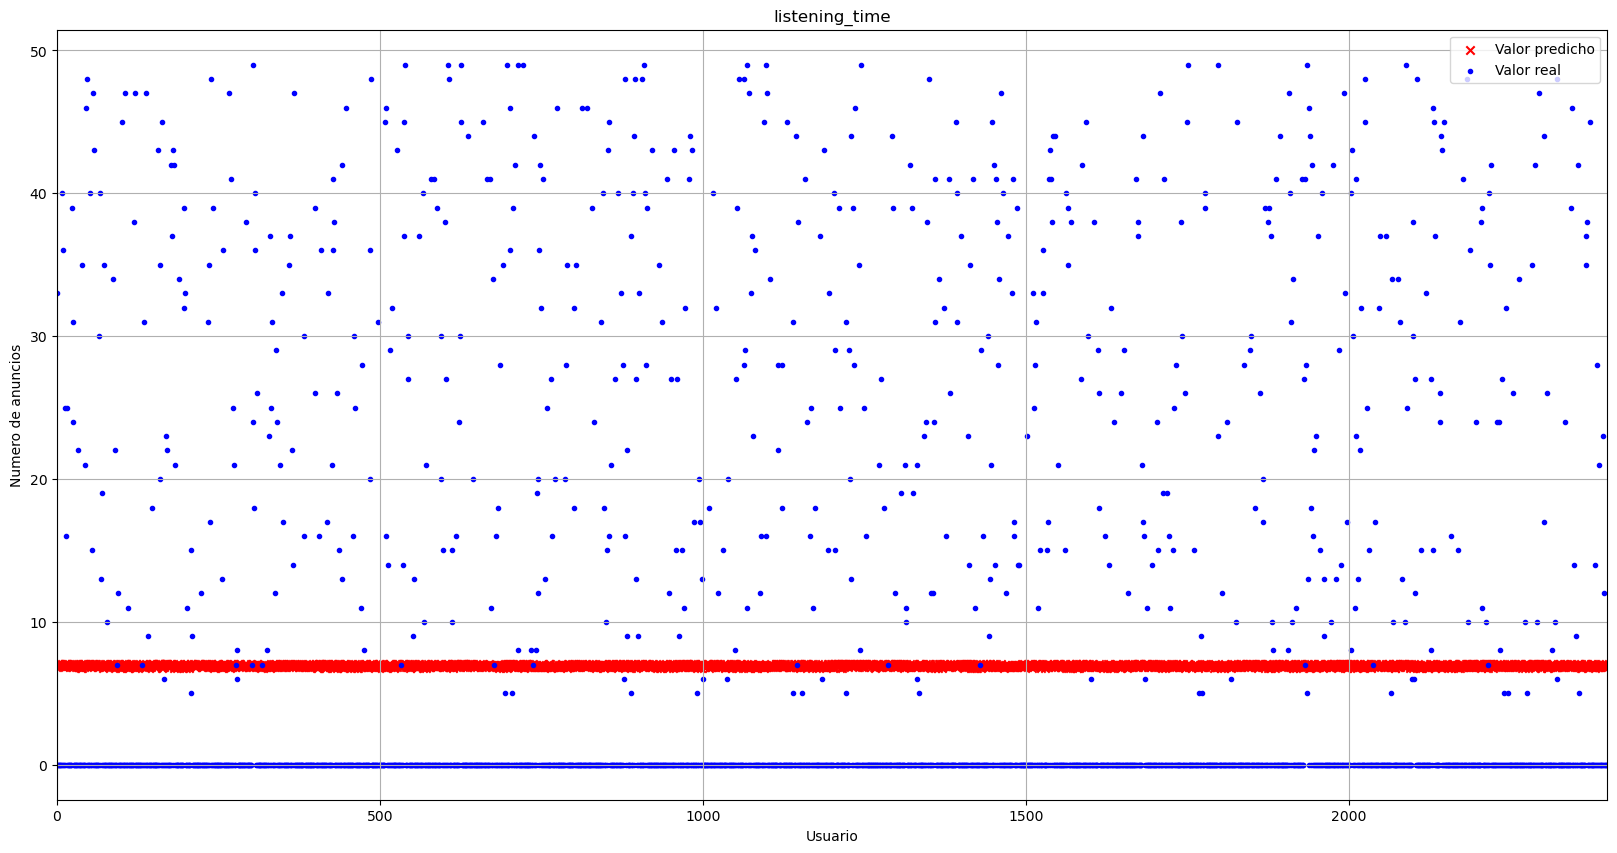

MAE: 10.494024884915175, MSE: 190.45738844754203, RMSE: 13.800630001834772


In [34]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)



plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("listening_time")
plt.legend()
plt.show()

MAE1, MSE1, RMSE1 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE1}, MSE: {MSE1}, RMSE: {RMSE1}")

#### Implementacion 2. age

In [35]:
X = pd.DataFrame({"age":file["age"]})
y = file["ads_listened_per_week"]

In [36]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    #mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

Fold 0
MAE: 9.728869805819379, MSE: 159.47083322270248, RMSE: 12.628176163749954
Fold 1
MAE: 10.53058803973329, MSE: 193.3852574802859, RMSE: 13.906302796943763
Fold 2
MAE: 10.486129578395532, MSE: 192.21920037363003, RMSE: 13.864313916441377
Fold 3
MAE: 10.475684046316369, MSE: 189.06458647307846, RMSE: 13.75007587153898
Fold 4
MAE: 10.196178905270527, MSE: 168.13429706331587, RMSE: 12.966660983588485
Fold 5
MAE: 11.173967704263381, MSE: 222.7069029482499, RMSE: 14.923367681198835
Fold 6
MAE: 10.048578702017817, MSE: 170.25112495200597, RMSE: 13.048031458883212
Fold 7
MAE: 11.19713283156891, MSE: 220.79824848617616, RMSE: 14.85928156022949
Fold 8
MAE: 10.23281719695971, MSE: 176.2202191097685, RMSE: 13.274796386753678
Fold 9
MAE: 9.891092449513128, MSE: 168.31658700740326, RMSE: 12.973688257677662


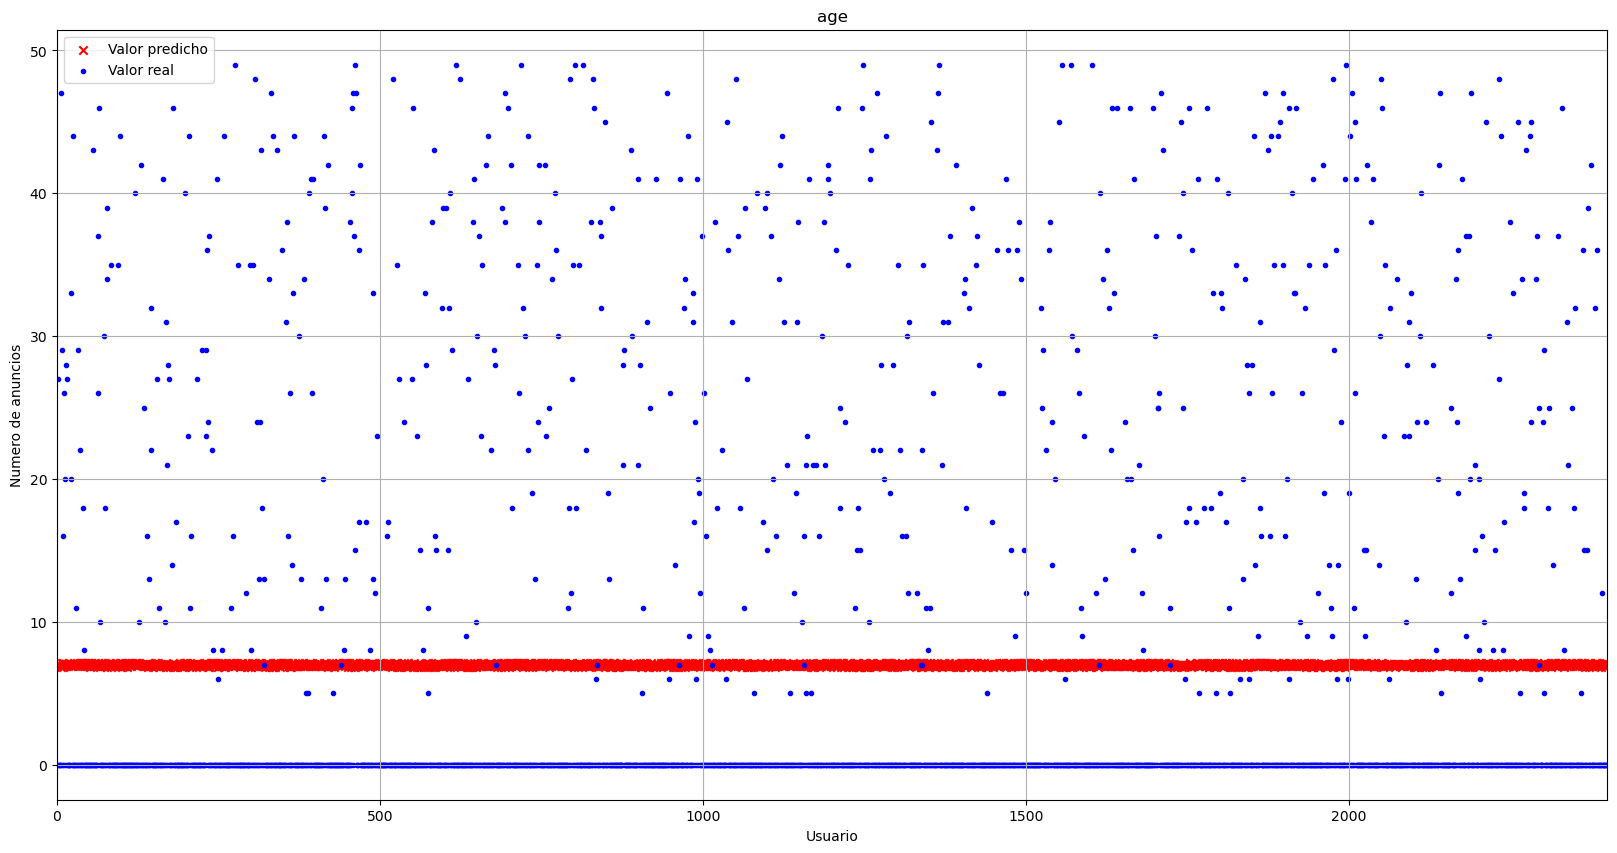

MAE: 10.423490723743893, MSE: 184.17917211867498, RMSE: 13.571262731178518


In [37]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)



plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("age")
plt.legend()
plt.show()

MAE2, MSE2, RMSE2 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE2}, MSE: {MSE2}, RMSE: {RMSE2}")

#### Implementacion 3. offline_listening

In [38]:
X = pd.DataFrame({"offline_listening":file["offline_listening"]})
y = file["ads_listened_per_week"]

In [39]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    #mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

Fold 0
MAE: 2.9111203847342773, MSE: 38.730683534891604, RMSE: 6.223398069775997
Fold 1
MAE: 3.029880574212883, MSE: 45.29307150038793, RMSE: 6.730012741472926
Fold 2
MAE: 3.9792042524036675, MSE: 53.77513351912879, RMSE: 7.333153040754624
Fold 3
MAE: 2.9483503374138444, MSE: 41.79249120097001, RMSE: 6.464711223323901
Fold 4
MAE: 2.741584686246246, MSE: 37.8751363877676, RMSE: 6.15427789328428
Fold 5
MAE: 3.004425011717087, MSE: 45.56400729320985, RMSE: 6.750111650425484
Fold 6
MAE: 3.1325784560112138, MSE: 45.25111104963407, RMSE: 6.726894606698849
Fold 7
MAE: 3.461548446451701, MSE: 49.30678309855939, RMSE: 7.021878886634217
Fold 8
MAE: 2.9839891554353626, MSE: 43.08394922526919, RMSE: 6.563836471551465
Fold 9
MAE: 3.1918786097079956, MSE: 46.46122940838069, RMSE: 6.816247457977203


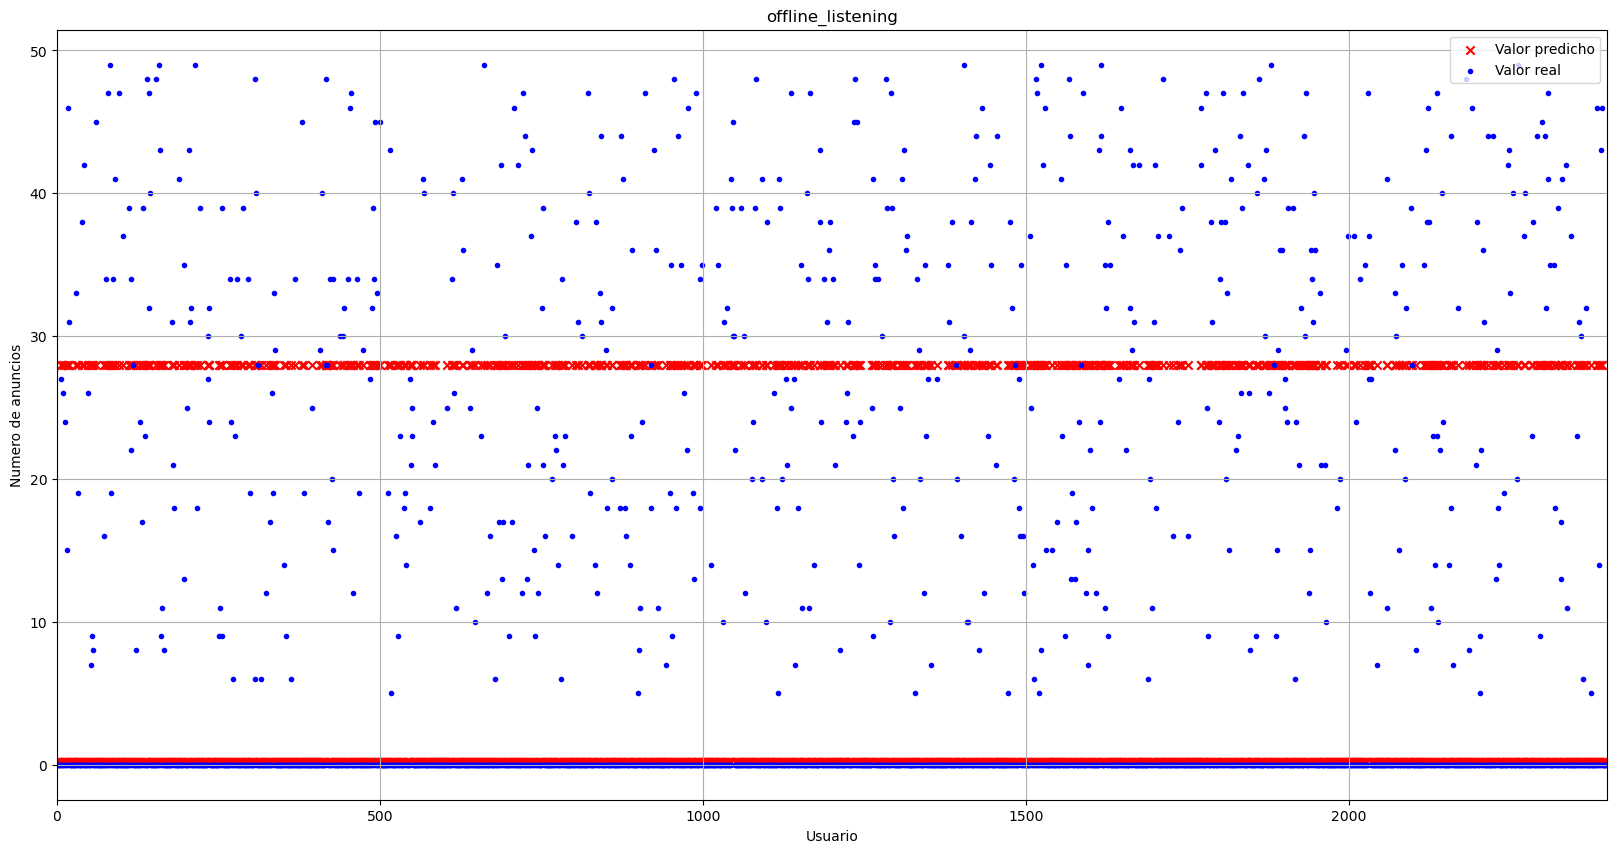

MAE: 2.7922475226314716, MSE: 38.207817566367645, RMSE: 6.181247250059461


In [40]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)



plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("offline_listening")
plt.legend()
plt.show()

MAE3, MSE3, RMSE3 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE3}, MSE: {MSE3}, RMSE: {RMSE3}")

#### Implementacion 4. songs_played_per_day

In [41]:
X = pd.DataFrame({"songs_played_per_day":file["songs_played_per_day"]})
y = file["ads_listened_per_week"]

In [42]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    #mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

Fold 0
MAE: 10.251560838902718, MSE: 185.10818300875556, RMSE: 13.605446814006351
Fold 1
MAE: 10.418055350548993, MSE: 187.91932887976535, RMSE: 13.708367112087615
Fold 2
MAE: 10.28196629727661, MSE: 183.55481272247502, RMSE: 13.548240207586925
Fold 3
MAE: 10.092743783246691, MSE: 167.14609851671682, RMSE: 12.928499468875605
Fold 4
MAE: 10.606751248119592, MSE: 185.89015865105694, RMSE: 13.634154123049106
Fold 5
MAE: 10.650827907304338, MSE: 200.35351765183546, RMSE: 14.154628841896049
Fold 6
MAE: 10.432828289345014, MSE: 186.20879518889643, RMSE: 13.645834352977337
Fold 7
MAE: 11.061586254366212, MSE: 215.21457727285164, RMSE: 14.670193498139405
Fold 8
MAE: 10.264936431676395, MSE: 178.0703651499899, RMSE: 13.34430084905125
Fold 9
MAE: 10.1694210522732, MSE: 174.7594767358075, RMSE: 13.219662504610604


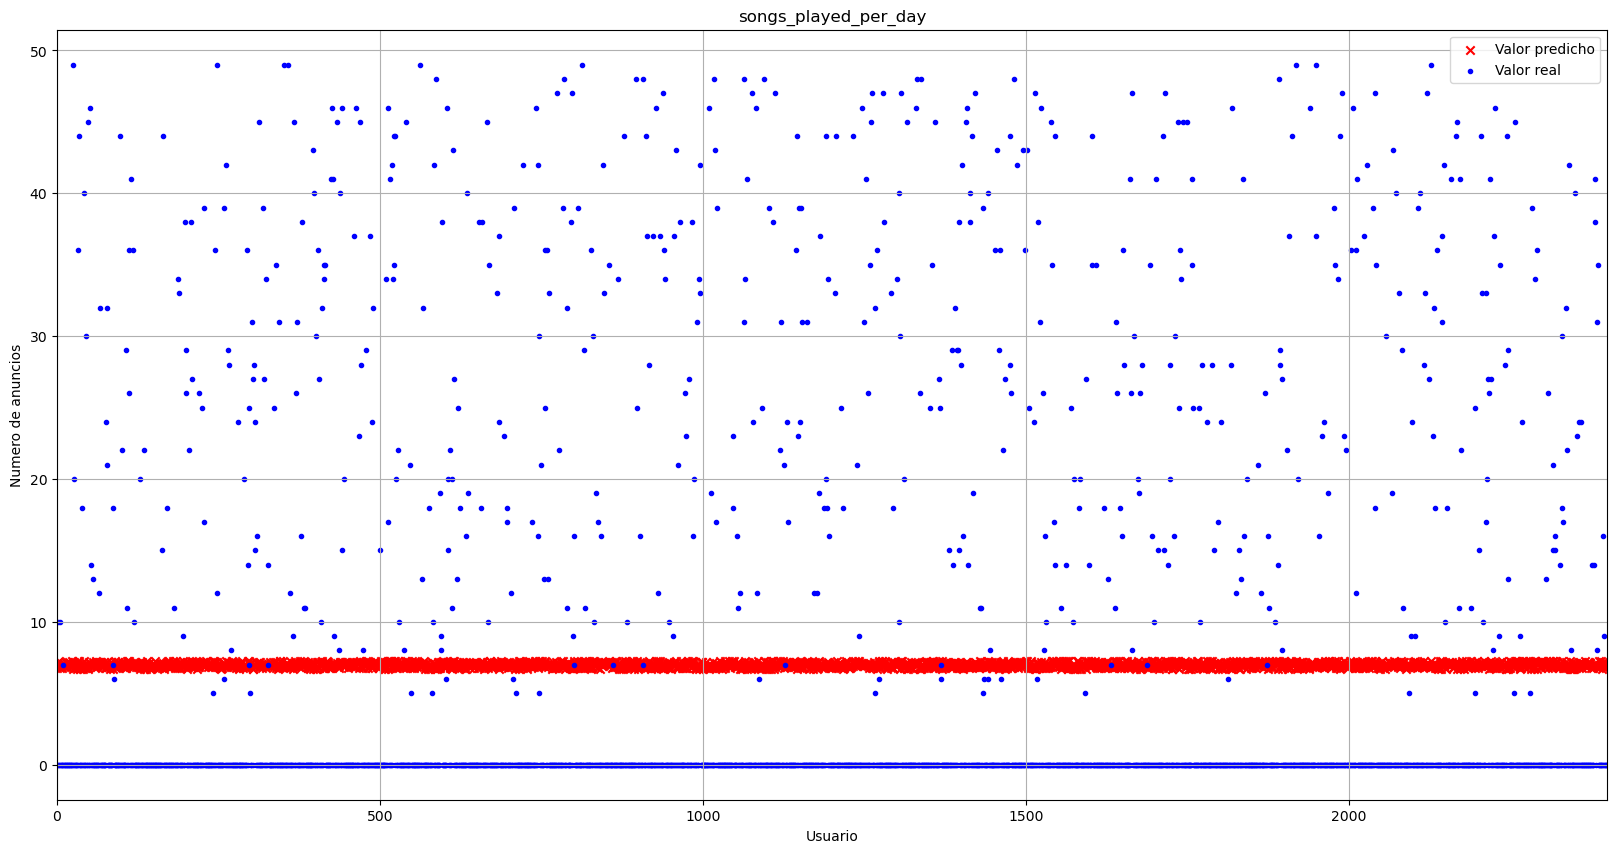

MAE: 10.388503464993992, MSE: 183.1997193820654, RMSE: 13.535129086272706


In [43]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)



plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100)
plt.title("songs_played_per_day")
plt.legend()
plt.show()

MAE4, MSE4, RMSE4 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE4}, MSE: {MSE4}, RMSE: {RMSE4}")

### Apartado b
Se procede a comparar los distintos errores de cada implementación.

In [44]:
print(f"Error implementación 1: {MSE1}")
print(f"Error implementación 2: {MSE2}")
print(f"Error implementación 3: {MSE3}")
print(f"Error implementación 4: {MSE4}")

listaError = [MSE1, MSE2, MSE3, MSE4]
menor = np.min(listaError)
              
print(f"El menor error es {menor}, de la implementacion {listaError.index(menor) + 1}.")

Error implementación 1: 190.45738844754203
Error implementación 2: 184.17917211867498
Error implementación 3: 38.207817566367645
Error implementación 4: 183.1997193820654
El menor error es 38.207817566367645, de la implementacion 3.


### Apartado c

La discusión se toma en la documentación.

## Apartado 2
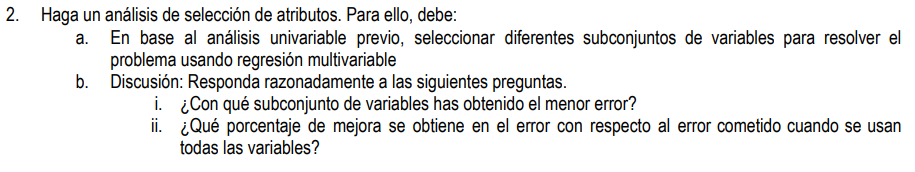

Tal como indica el enunciado, hay que formar subconjuntos de variables para resolver el problema de forma multivariable. Se va a volver a predecir la columna "ads_listened_per_week". Teniendo en cuenta el apartado 1 y el punto ii del apartado 2, se formarán 3 grupos. El primero estará formado por "listening_time" y "age", el segundo lo estará por "offline_listening" y "songs_played_per_day" y el tercero por todas las columnas del dataset (excluyendo la clase). De esta forma se compara un subconjunto que no incluye una columna que hemos visto que es relevante (offline_listening), otro que si la incluye y otro que incluye todas las columnas para ver si es posible mejorar a esa columna.

## Apartado 3
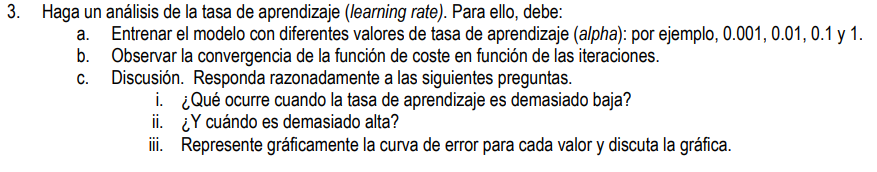

## Apartado 4
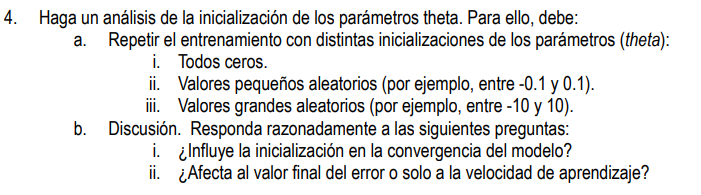

## Apartado 5
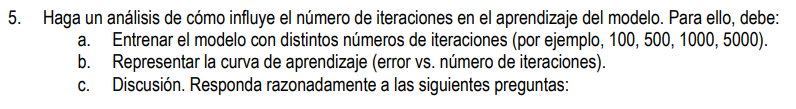
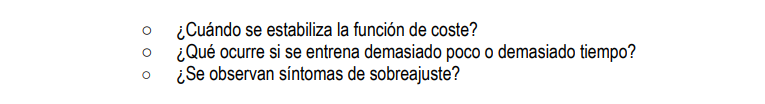